<a href="https://colab.research.google.com/github/satanimeet/machinelearning/blob/main/telecom_customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text
import seaborn as sns

In [2]:
from google.colab import drive


In [3]:
path = ("/content/drive/MyDrive/dataset/customer_churn.csv")
olddata = pd.read_csv(path)
olddata.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
olddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
olddata.shape

(7043, 21)

In [6]:
olddata.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


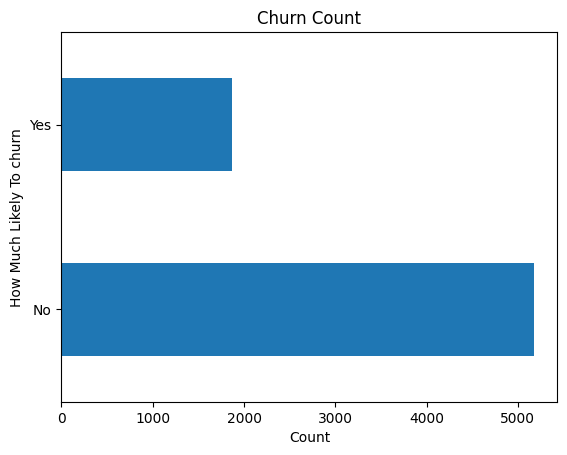

In [7]:
olddata['Churn'].value_counts().plot(kind='barh')
plt.xlabel("Count")
plt.ylabel("How Much Likely To churn")
plt.title("Churn Count")
plt.show()

Outliers for feature 'SeniorCitizen':
      SeniorCitizen
20                1
30                1
31                1
34                1
50                1
...             ...
7023              1
7029              1
7031              1
7032              1
7041              1

[1142 rows x 1 columns]
--------------------


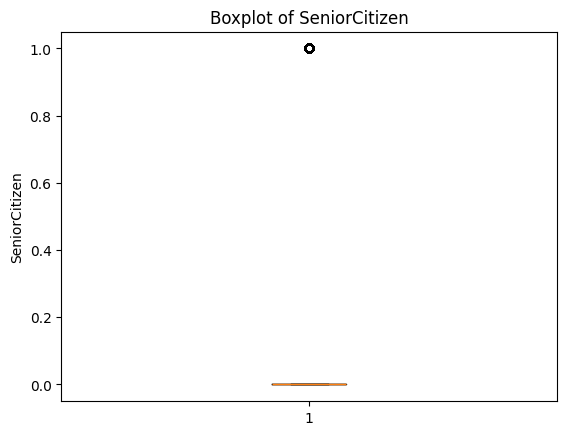

Outliers for feature 'tenure':
Empty DataFrame
Columns: [tenure]
Index: []
--------------------


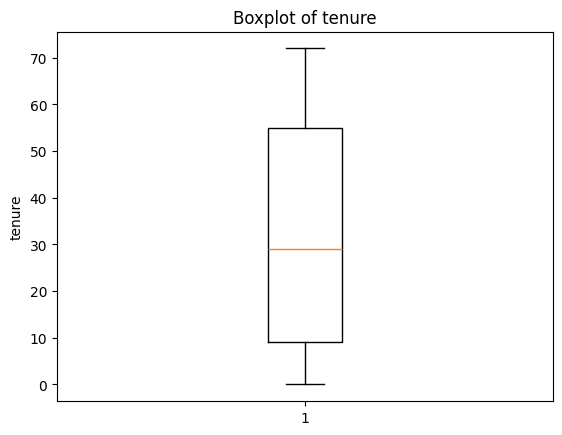

Outliers for feature 'MonthlyCharges':
Empty DataFrame
Columns: [MonthlyCharges]
Index: []
--------------------


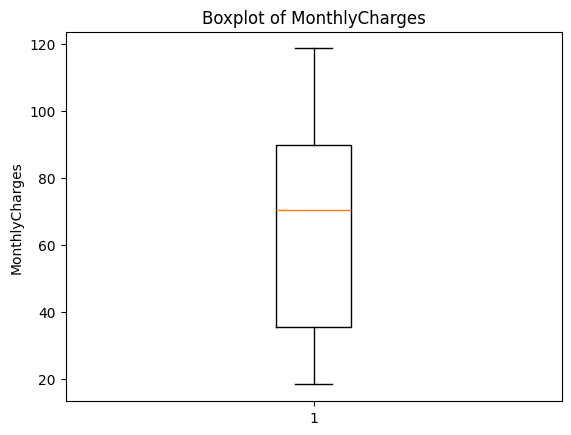

In [8]:

numerical_features = olddata.select_dtypes(include=np.number).columns

for col in numerical_features:

    Q1 = olddata[col].quantile(0.25)
    Q3 = olddata[col].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    outliers = olddata[(olddata[col] < lower_bound) | (olddata[col] > upper_bound)]


    print(f"Outliers for feature '{col}':")
    print(outliers[[col]])
    print("-" * 20)


    plt.figure()
    plt.boxplot(olddata[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()


In [9]:
total_customers = len(olddata)
churned_customers = len(olddata[olddata['Churn'] == 'Yes'])
churn_percentage = (churned_customers / total_customers) * 100

print(f"Total Customers: {total_customers}")
print(f"Churned Customers: {churned_customers}")
print(f"Churn Percentage: {churn_percentage:.2f}%")
print(f"NON Churn Percentage:  {100 - churn_percentage:.2f}%")

Total Customers: 7043
Churned Customers: 1869
Churn Percentage: 26.54%
NON Churn Percentage:  73.46%


In [10]:

if 'gender' in olddata.columns:
    gender_counts = olddata['gender'].value_counts()
    print(gender_counts)

    total = len(olddata)
    male_ratio = gender_counts.get('Male', 0) / total
    female_ratio = gender_counts.get('Female', 0) / total

    print(f"\nGender Ratio:")
    print(f"Male: {male_ratio:.2%}")
    print(f"Female: {female_ratio:.2%}")
else:
    print("Error: 'gender' column not found in the DataFrame.")

gender
Male      3555
Female    3488
Name: count, dtype: int64

Gender Ratio:
Male: 50.48%
Female: 49.52%


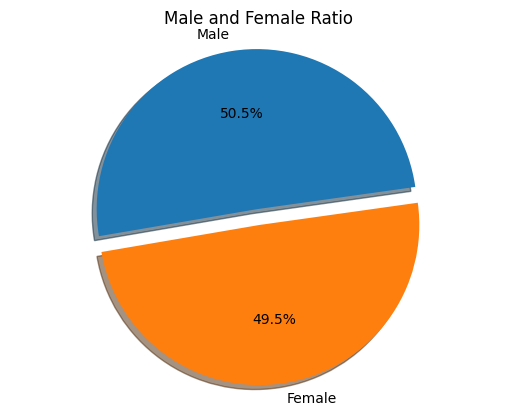

In [11]:
labels = ['Male', 'Female']
sizes = [male_ratio, female_ratio]
explode = (0.1, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=8)
ax1.axis('equal')

plt.title("Male and Female Ratio")
plt.show()


Analyzing Churn vs. customerID:
Churn        No  Yes
customerID          
0002-ORFBO  1.0  NaN
0003-MKNFE  1.0  NaN
0004-TLHLJ  NaN  1.0
0011-IGKFF  NaN  1.0
0013-EXCHZ  NaN  1.0
...         ...  ...
9987-LUTYD  1.0  NaN
9992-RRAMN  NaN  1.0
9992-UJOEL  1.0  NaN
9993-LHIEB  1.0  NaN
9995-HOTOH  1.0  NaN

[7043 rows x 2 columns]


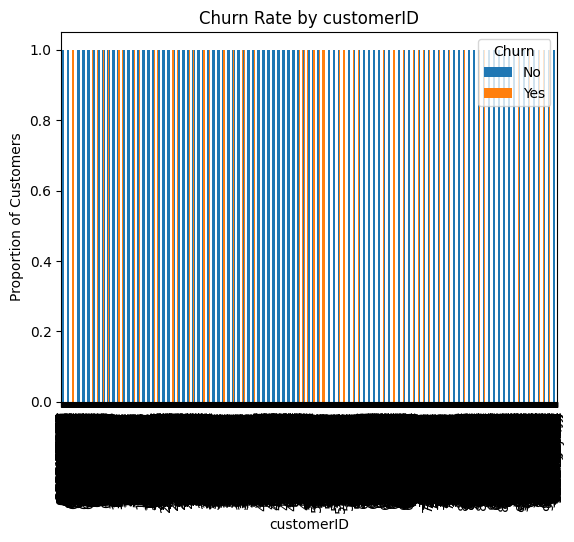


Analyzing Churn vs. gender:
Churn         No       Yes
gender                    
Female  0.730791  0.269209
Male    0.738397  0.261603


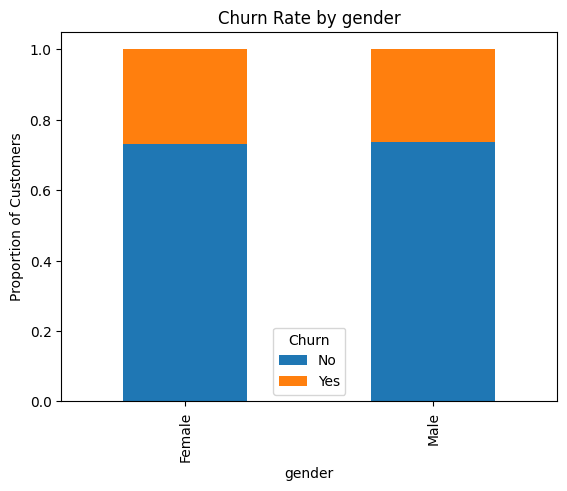


Analyzing Churn vs. SeniorCitizen:


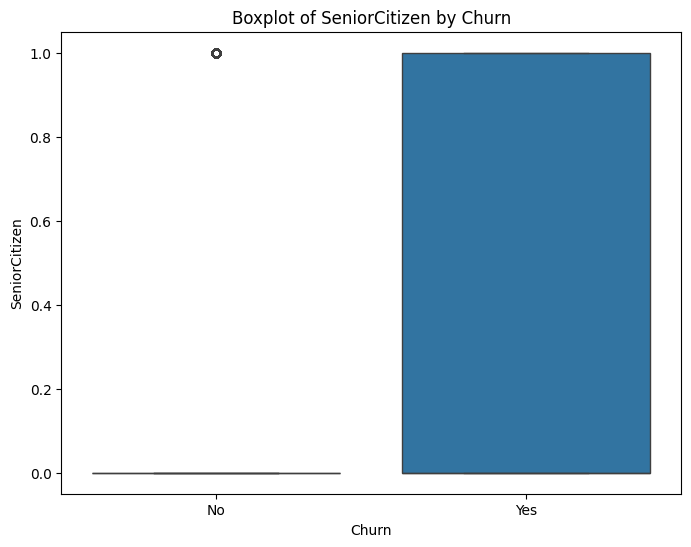

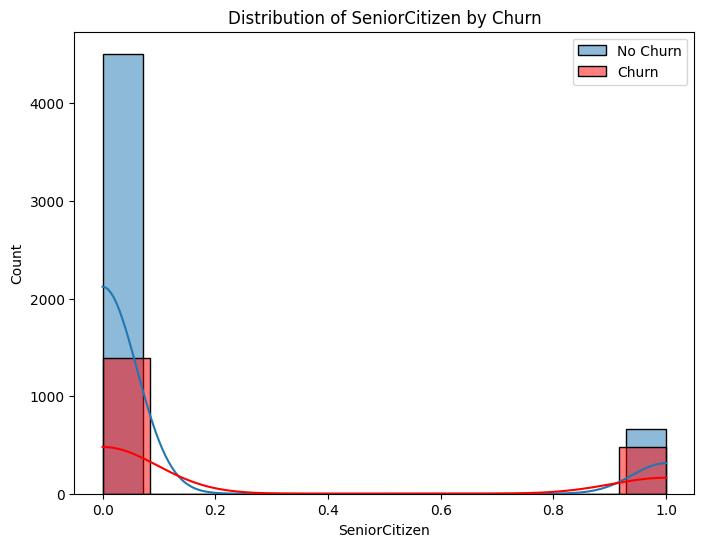

Correlation between SeniorCitizen and Churn: 0.15088932817647324

Analyzing Churn vs. Partner:
Churn          No       Yes
Partner                    
No       0.670420  0.329580
Yes      0.803351  0.196649


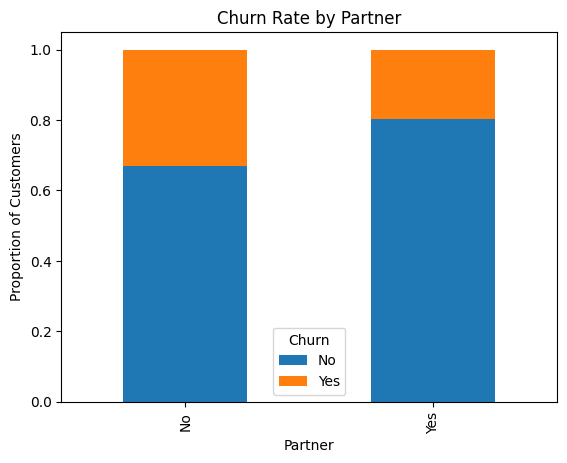


Analyzing Churn vs. Dependents:
Churn             No       Yes
Dependents                    
No          0.687209  0.312791
Yes         0.845498  0.154502


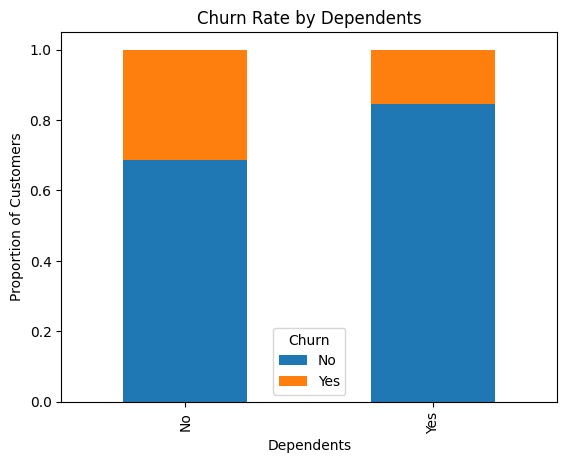


Analyzing Churn vs. tenure:


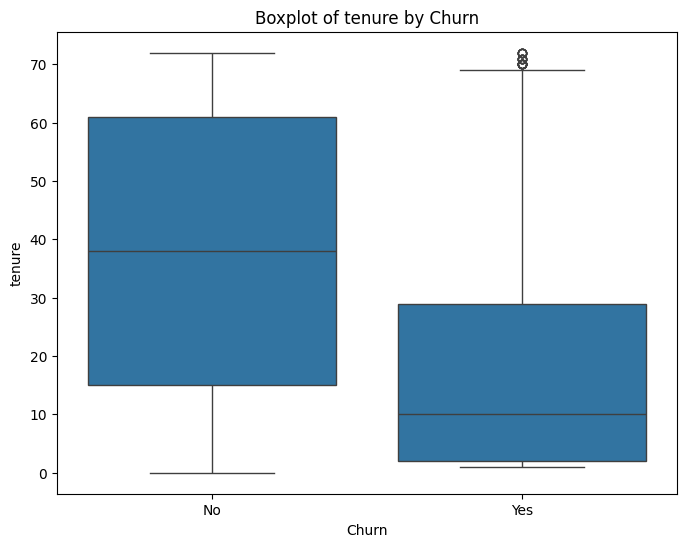

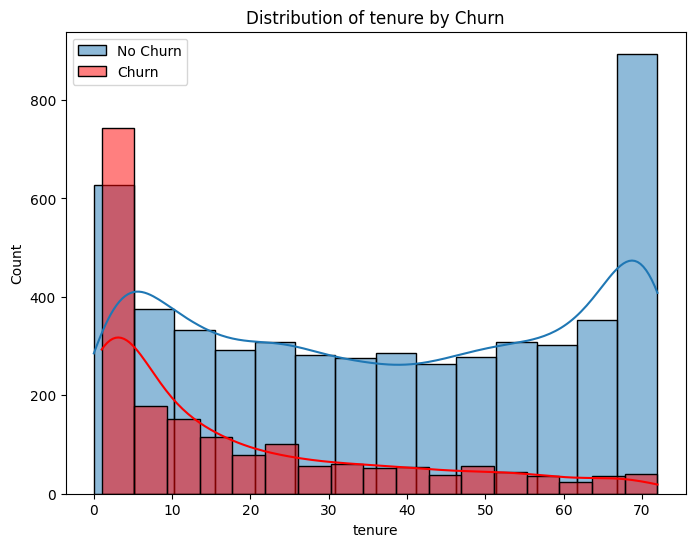

Correlation between tenure and Churn: -0.352228670113078

Analyzing Churn vs. PhoneService:
Churn               No       Yes
PhoneService                    
No            0.750733  0.249267
Yes           0.732904  0.267096


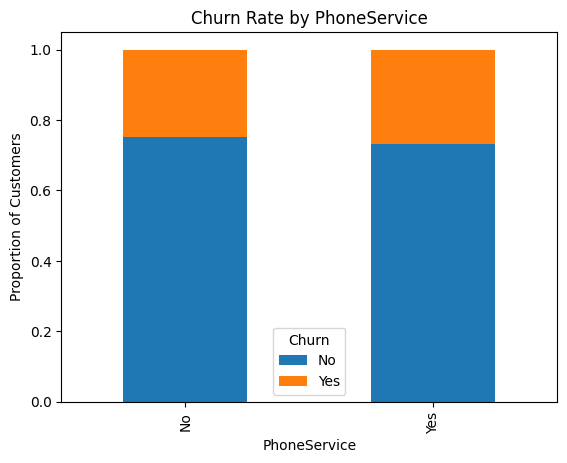


Analyzing Churn vs. MultipleLines:
Churn                   No       Yes
MultipleLines                       
No                0.749558  0.250442
No phone service  0.750733  0.249267
Yes               0.713901  0.286099


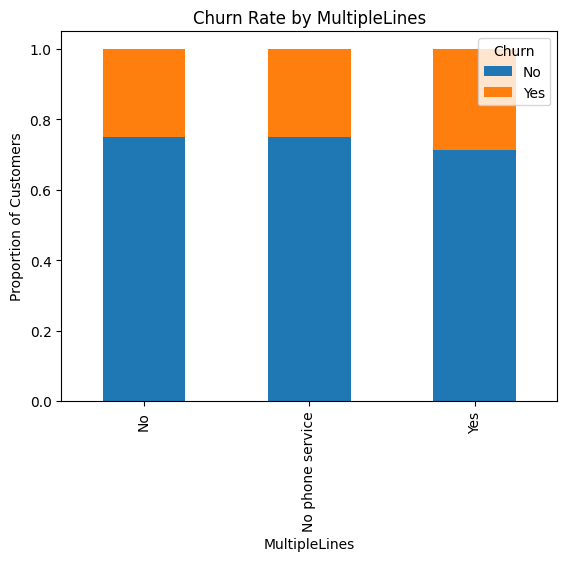


Analyzing Churn vs. InternetService:
Churn                  No       Yes
InternetService                    
DSL              0.810409  0.189591
Fiber optic      0.581072  0.418928
No               0.925950  0.074050


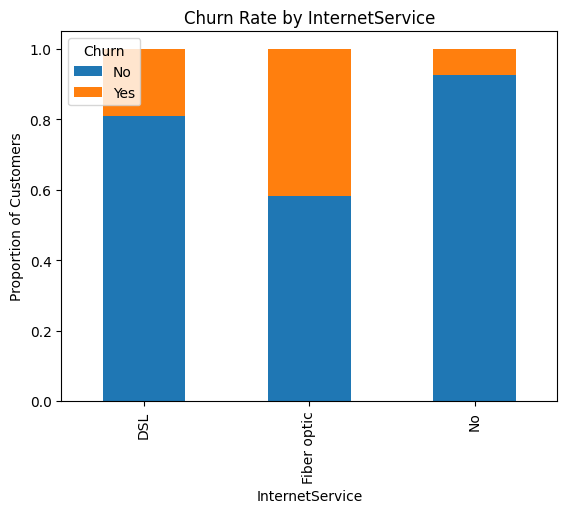


Analyzing Churn vs. OnlineSecurity:
Churn                      No       Yes
OnlineSecurity                         
No                   0.582333  0.417667
No internet service  0.925950  0.074050
Yes                  0.853888  0.146112


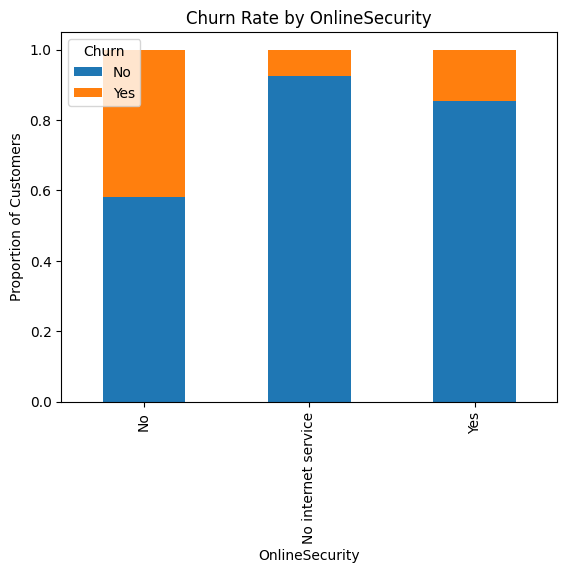


Analyzing Churn vs. OnlineBackup:
Churn                      No       Yes
OnlineBackup                           
No                   0.600712  0.399288
No internet service  0.925950  0.074050
Yes                  0.784685  0.215315


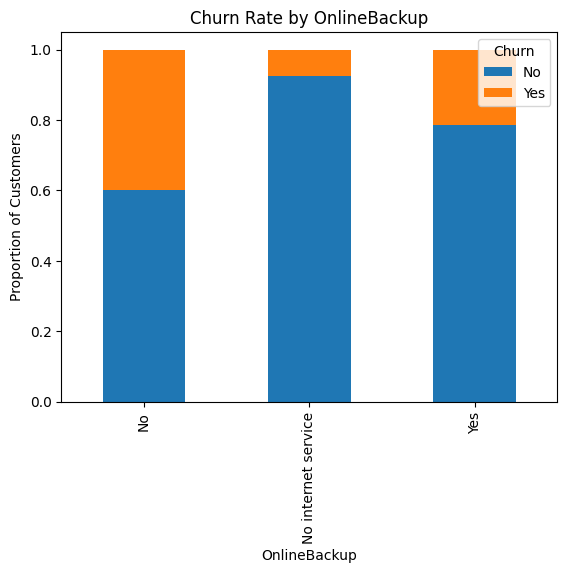


Analyzing Churn vs. DeviceProtection:
Churn                      No       Yes
DeviceProtection                       
No                   0.608724  0.391276
No internet service  0.925950  0.074050
Yes                  0.774979  0.225021


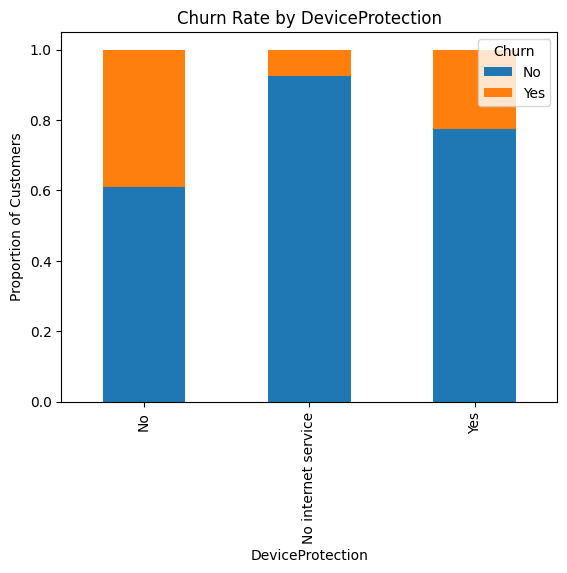


Analyzing Churn vs. TechSupport:
Churn                      No       Yes
TechSupport                            
No                   0.583645  0.416355
No internet service  0.925950  0.074050
Yes                  0.848337  0.151663


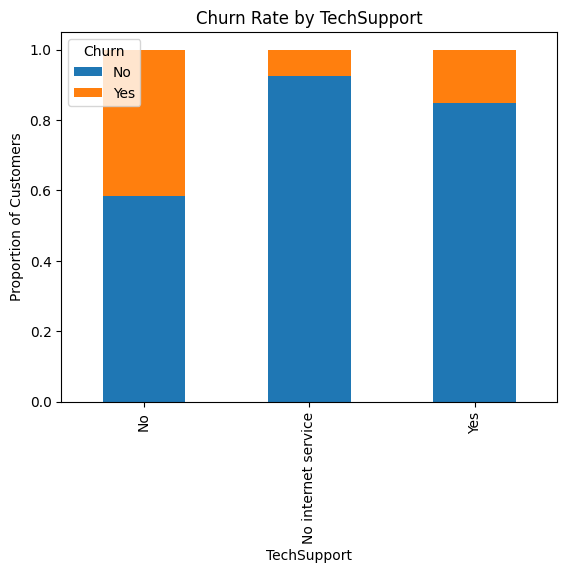


Analyzing Churn vs. StreamingTV:
Churn                      No       Yes
StreamingTV                            
No                   0.664769  0.335231
No internet service  0.925950  0.074050
Yes                  0.699298  0.300702


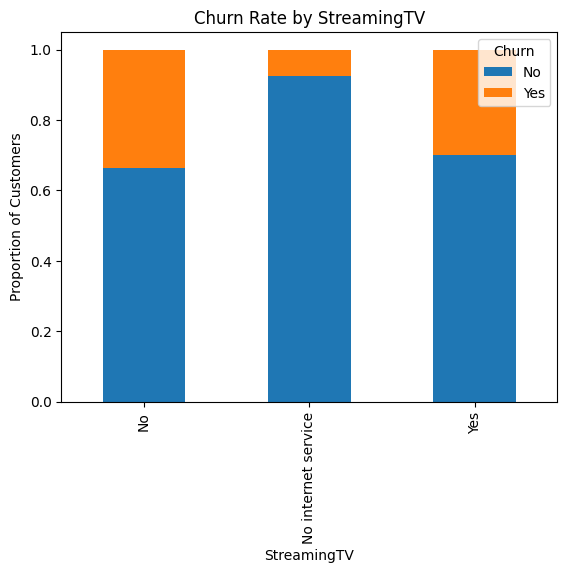


Analyzing Churn vs. StreamingMovies:
Churn                      No       Yes
StreamingMovies                        
No                   0.663196  0.336804
No internet service  0.925950  0.074050
Yes                  0.700586  0.299414


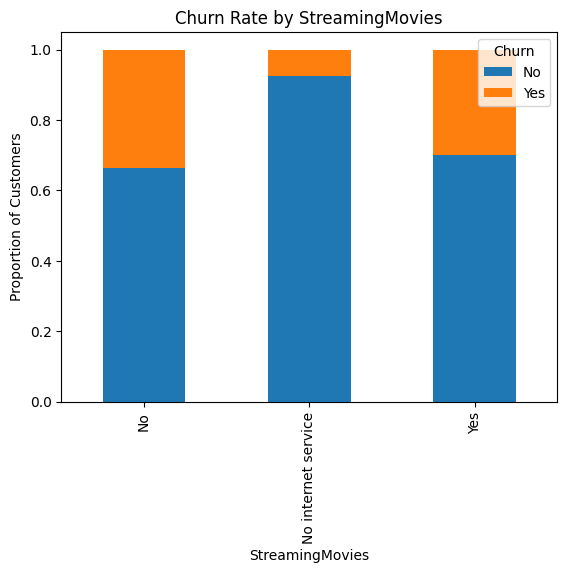


Analyzing Churn vs. Contract:
Churn                 No       Yes
Contract                          
Month-to-month  0.572903  0.427097
One year        0.887305  0.112695
Two year        0.971681  0.028319


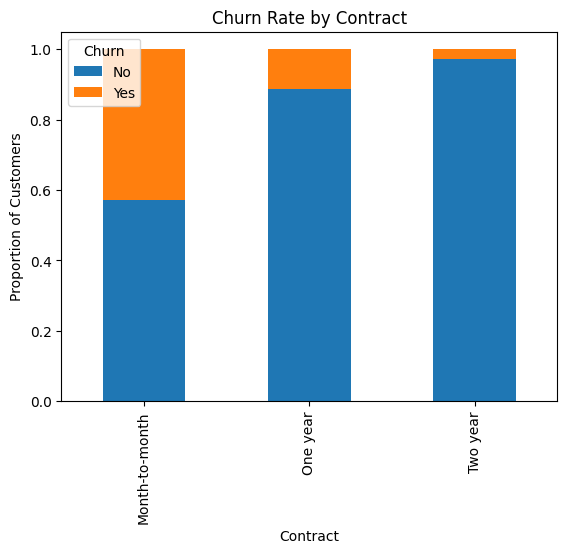


Analyzing Churn vs. PaperlessBilling:
Churn                   No       Yes
PaperlessBilling                    
No                0.836699  0.163301
Yes               0.664349  0.335651


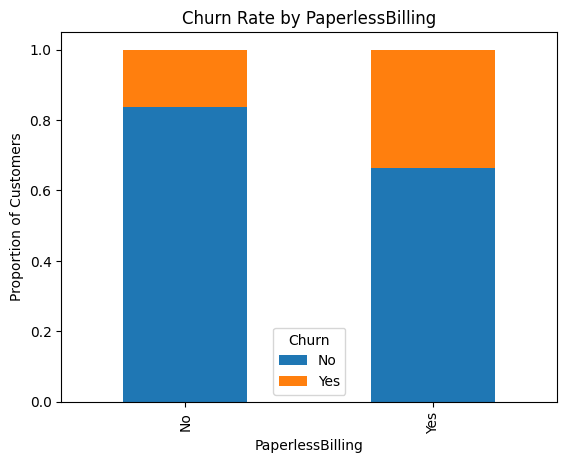


Analyzing Churn vs. PaymentMethod:
Churn                            No       Yes
PaymentMethod                                
Bank transfer (automatic)  0.832902  0.167098
Credit card (automatic)    0.847569  0.152431
Electronic check           0.547146  0.452854
Mailed check               0.808933  0.191067


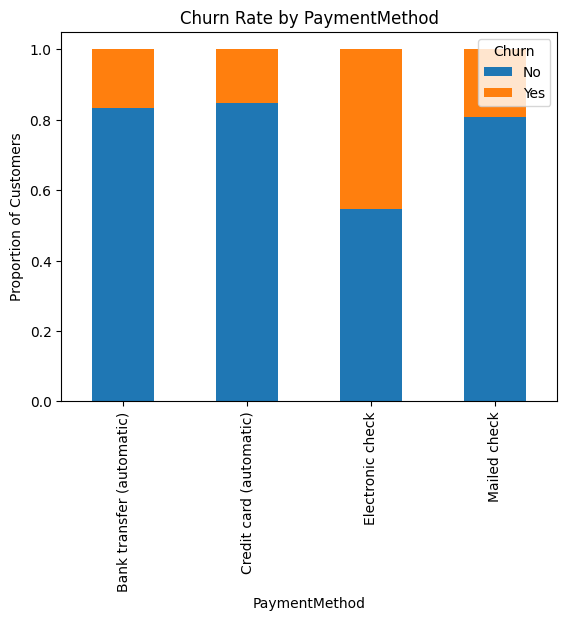


Analyzing Churn vs. MonthlyCharges:


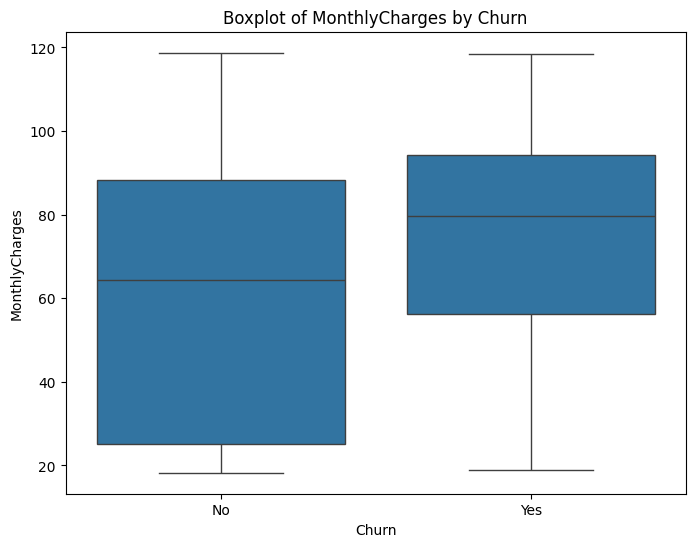

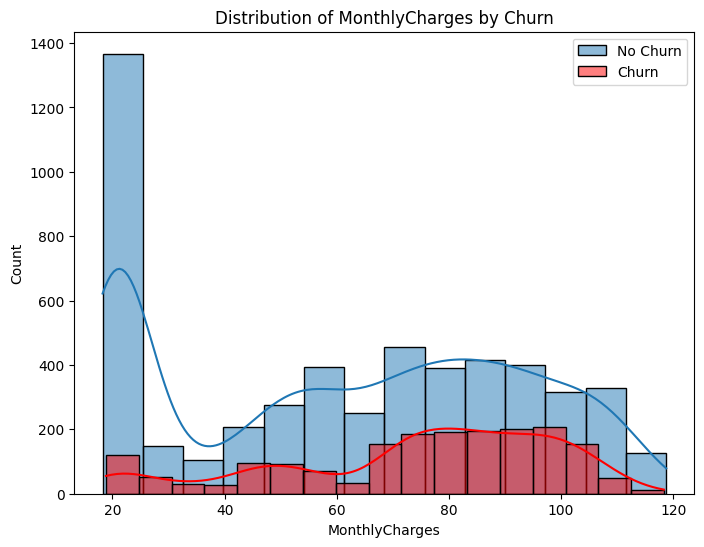

Correlation between MonthlyCharges and Churn: 0.19335642223784694

Analyzing Churn vs. TotalCharges:
Churn          No  Yes
TotalCharges          
              1.0  NaN
100.2         1.0  NaN
100.25        NaN  1.0
100.35        1.0  NaN
100.4         NaN  1.0
...           ...  ...
997.75        1.0  NaN
998.1         1.0  NaN
999.45        NaN  1.0
999.8         1.0  NaN
999.9         1.0  NaN

[6531 rows x 2 columns]


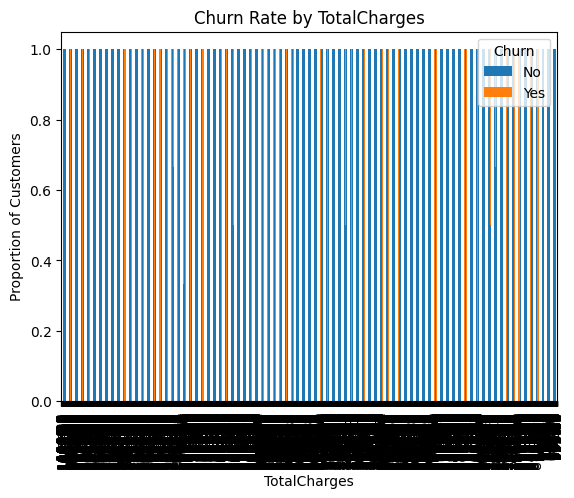


Analyzing Churn vs. Churn:


ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

In [13]:

for column in olddata.columns:
    if olddata[column].dtype == 'object':
        print(f"\nAnalyzing Churn vs. {column}:")
        churn_by_feature = olddata.groupby(column)['Churn'].value_counts(normalize=True).unstack()
        print(churn_by_feature)

        churn_by_feature.plot(kind='bar', stacked=True)
        plt.title(f'Churn Rate by {column}')
        plt.ylabel('Proportion of Customers')
        plt.xlabel(column)
        plt.show()
    elif olddata[column].dtype in ['int64', 'float64']:
      print(f"\nAnalyzing Churn vs. {column}:")
      plt.figure(figsize=(8, 6))
      sns.boxplot(x='Churn', y=column, data=olddata)
      plt.title(f'Boxplot of {column} by Churn')
      plt.show()

      plt.figure(figsize=(8, 6))
      sns.histplot(olddata[olddata['Churn'] == 'No'][column], label='No Churn', kde=True)
      sns.histplot(olddata[olddata['Churn'] == 'Yes'][column], label='Churn', kde=True, color='red')
      plt.title(f'Distribution of {column} by Churn')
      plt.legend()
      plt.show()


      olddata['Churn_numeric'] = olddata['Churn'].map({'No': 0, 'Yes': 1})

      correlation = olddata[column].corr(olddata['Churn_numeric'])
      print(f"Correlation between {column} and Churn: {correlation}")

      olddata.drop('Churn_numeric', axis=1, inplace = True) # Removing the temporary column

In [14]:
if 'SeniorCitizen' in olddata.columns and 'Churn' in olddata.columns:
    senior_citizens = olddata[olddata['SeniorCitizen'] == 1]
    male_senior_churners = senior_citizens[(senior_citizens['gender'] == 'Male') & (senior_citizens['Churn'] == 'Yes')]
    total_senior_citizens = len(senior_citizens)
    print(f"\nTotal Senior Citizens: {total_senior_citizens}")

    senior_gender_counts = senior_citizens['gender'].value_counts()
    print("\nSenior Citizen Gender Distribution:")
    print(senior_gender_counts)



    senior_churn_counts = senior_citizens['Churn'].value_counts(normalize=True) * 100
    print("\nChurn likelihood among Senior Citizens:")
    print(senior_churn_counts)
    totalcitizens_male_churner=len(senior_citizens[(senior_citizens['gender'] == 'Male') & (senior_citizens['Churn'] == 'Yes')])
    print(f"\nMale citizens Churner:- {totalcitizens_male_churner}")
    totalcitizens_Female_churner=len(senior_citizens[(senior_citizens['gender'] == 'Female') & (senior_citizens['Churn'] == 'Yes')])
    print(f"\nFemale citizens Churner:- {totalcitizens_Female_churner}")


else:
    print("Error")


Total Senior Citizens: 1142

Senior Citizen Gender Distribution:
gender
Male      574
Female    568
Name: count, dtype: int64

Churn likelihood among Senior Citizens:
Churn
No     58.318739
Yes    41.681261
Name: proportion, dtype: float64

Male citizens Churner:- 236

Female citizens Churner:- 240


In [15]:

if 'DeviceProtection' in olddata.columns and 'Churn' in olddata.columns:

    device_protection_churn = olddata.groupby(['DeviceProtection', 'Churn']).size().unstack(fill_value=0)

    # Calculate churn percentages for each DeviceProtection category
    device_protection_churn['Total'] = device_protection_churn.sum(axis=1)
    device_protection_churn['Churn Percentage'] = (device_protection_churn['Yes'] / device_protection_churn['Total']) * 100

    print(device_protection_churn)
else:
    print("Error: 'DeviceProtection' or 'Churn' column not found in the DataFrame.")


Churn                  No   Yes  Total  Churn Percentage
DeviceProtection                                        
No                   1884  1211   3095         39.127625
No internet service  1413   113   1526          7.404980
Yes                  1877   545   2422         22.502064


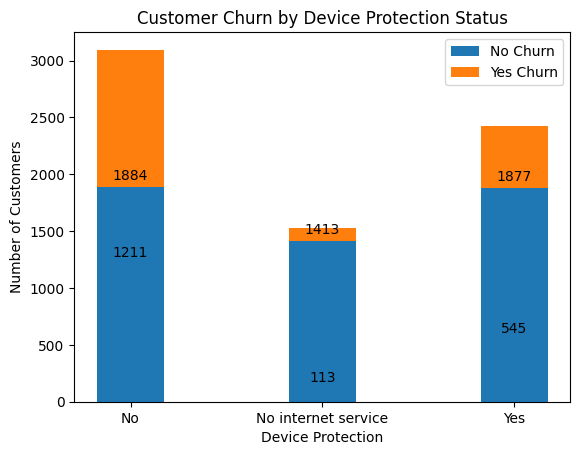

In [16]:


data = {
    'DeviceProtection': ['No', 'No internet service', 'Yes'],
    'No': [1884, 1413, 1877],
    'Yes': [1211, 113, 545],
    'Total': [3095, 1526, 2422],
    'Churn Percentage': [39.127625, 7.404980, 22.502064]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set position of bar on X axis
bar_width = 0.35

# Make the plot
fig, ax = plt.subplots()
bar1 = ax.bar(df['DeviceProtection'], df['No'], bar_width, label='No Churn')
bar2 = ax.bar(df['DeviceProtection'], df['Yes'], bar_width, bottom=df['No'], label='Yes Churn')

# Adding labels and title
ax.set_xlabel('Device Protection')
ax.set_ylabel('Number of Customers')
ax.set_title('Customer Churn by Device Protection Status')
ax.legend()


for bar in bar1 + bar2:
    height = bar.get_height()
    ax.annotate('{}'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.show()


In [17]:
if 'PaperlessBilling' in olddata.columns and 'Churn' in olddata.columns:
  PaperlessBilling_churn = olddata.groupby(['PaperlessBilling', 'Churn']).size().unstack(fill_value=0)
  PaperlessBilling_churn['Total'] = PaperlessBilling_churn.sum(axis=1)
  PaperlessBilling_churn['Churn Percentage'] = (PaperlessBilling_churn['Yes'] / PaperlessBilling_churn['Total']) * 100
  print(PaperlessBilling_churn)


Churn               No   Yes  Total  Churn Percentage
PaperlessBilling                                     
No                2403   469   2872         16.330084
Yes               2771  1400   4171         33.565092


In [18]:
if 'PhoneService' in olddata.columns and 'Churn' in olddata.columns:
  PhoneService_churn = olddata.groupby(['PhoneService', 'Churn']).size().unstack(fill_value=0)
  PhoneService_churn['Total'] = PhoneService_churn.sum(axis=1)
  PhoneService_churn['Churn Percentage'] = (PhoneService_churn['Yes'] / PhoneService_churn['Total']) * 100
  print(PhoneService_churn)

Churn           No   Yes  Total  Churn Percentage
PhoneService                                     
No             512   170    682         24.926686
Yes           4662  1699   6361         26.709637


In [19]:
if 'PaymentMethod' in olddata.columns and 'Churn' in olddata.columns:
  PaymentMethod_churn = olddata.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)
  print(PaymentMethod_churn)

Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  1286   258
Credit card (automatic)    1290   232
Electronic check           1294  1071
Mailed check               1304   308


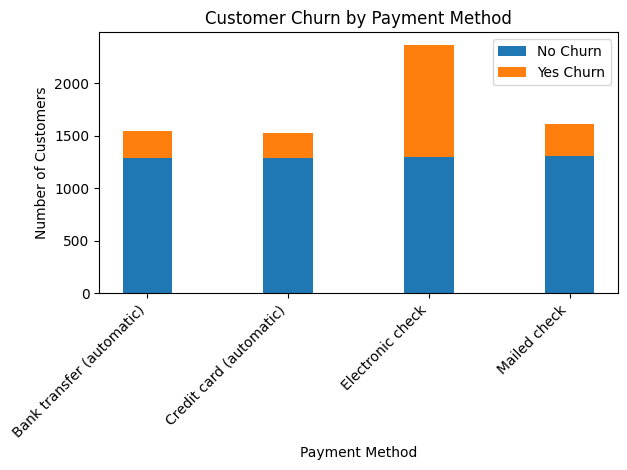

In [20]:
data = {
    'PaymentMethod': ['Bank transfer (automatic)', 'Credit card (automatic)', 'Electronic check', 'Mailed check'],
    'No': [1286, 1290, 1294, 1304],
    'Yes': [258, 232, 1071, 308]
}


df = pd.DataFrame(data)


bar_width = 0.35


fig, ax = plt.subplots()
bar1 = ax.bar(df['PaymentMethod'], df['No'], bar_width, label='No Churn')
bar2 = ax.bar(df['PaymentMethod'], df['Yes'], bar_width, bottom=df['No'], label='Yes Churn')


ax.set_xlabel('Payment Method')
ax.set_ylabel('Number of Customers')
ax.set_title('Customer Churn by Payment Method')
ax.legend()


plt.xticks(rotation=45, ha='right')



plt.tight_layout()
plt.show()

In [21]:
newdata = olddata.copy()

In [22]:
newdata.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [23]:
newdata.drop(['customerID'],axis=1,inplace=True)

In [24]:
def tenure_to_years(tenure):
    if 0 <= tenure <= 12:
        return '0-1'
    elif 13 <= tenure <= 24:
        return '1-2'
    elif 25 <= tenure <= 36:
        return '2-3'
    elif 37 <= tenure <= 48:
        return '3-4'
    elif 49 <= tenure <= 60:
        return '4-5'
    elif tenure > 60 :
        return '5+'
    else:
        return 'Unknown'

newdata['tenure_years'] = newdata['tenure'].apply(tenure_to_years)
newdata['tenure_years'].value_counts()

newdata.drop(['tenure'],axis=1,inplace=True)



In [25]:
newdata['Churn'] = np.where(newdata['Churn'] == 'Yes', 1, 0)

In [26]:
newdata['TotalCharges'] = pd.to_numeric(newdata['TotalCharges'], errors='coerce')
newdata['MonthlyCharges'] = pd.to_numeric(newdata['MonthlyCharges'], errors='coerce')
categorical_columns = [col for col in newdata.columns
                       if col not in ['TotalCharges','MonthlyCharges','Churn'] and newdata[col].dtype=='object']

newdata_dummies = pd.get_dummies(newdata, columns=categorical_columns, dtype='int')
newdata_dummies.head()


,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_years_0-1,tenure_years_1-2,tenure_years_2-3,tenure_years_3-4,tenure_years_4-5,tenure_years_5+
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


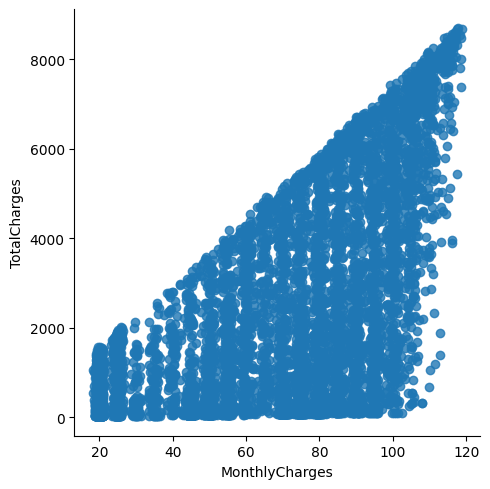

In [27]:
sns.lmplot(data=newdata_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

In [ ]:

newdata_dummies.to_csv('filter_churn.csv', index=False)